In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
import matplotlib as plt

In [2]:
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Problem 1
<b>A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv</b>

<b>1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually</b>

<b>A: 

µA1-Mean of hours of Relief for Treatment A at level 1<br/>
µA2-Mean of hours of Relief for Treatment A at level 2<br/>
µA3-Mean of hours of Relief for Treatment A at level 3<br/>
µB1-Mean of hours of Relief for Treatment B at level 1<br/>
µB2-Mean of hours of Relief for Treatment B at level 2<br/>
µB3-Mean of hours of Relief for Treatment B at level 3<br/>
<br/>
Null and Alternate Hypothesis for conducting Treatment A<br/>
H0-µA1=µA2=µA3<br/>
Ha-(µA1≠µA2≠µA3) or (µA1≠µA2=µA3) or (µA1=µA2≠µA3) or (µA1=µA3≠µA2)<br/>
Atleast one pair of means not equal<br/>
<br/>
Null and Alternate Hypothesis for conducting Treatment B<br/>
H0-µB1=µB2=µB3<br/>
Ha-(µB1≠µB2≠µA3) or (µB1≠µB2=µB3) or (µB1=µB2≠µB3) or (µB1=µB3≠µB2)<br/>
Atleast one pair of means not equal<br/></b>

In [4]:
df=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\11.Advanced Statistics-Week-4\\Fever-1.csv')

In [5]:
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [7]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


<br/>

<b>1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’.<br/> 
State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.</b>

In [8]:
df.A=pd.Categorical(df.A)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: category(1), float64(1), int64(2)
memory usage: 1.1 KB


In [10]:
formula1='Relief ~ C(A)'
model1=ols(formula1,df).fit()
anov_tab1=anova_lm(model1)
print(anov_tab1)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


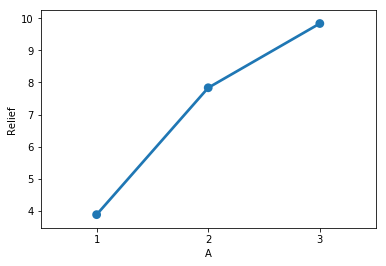

In [11]:
sns.pointplot(x='A',y='Relief',data=df,ci=None)

<br/>

<b>1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’.<br/> 
State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.</b>

In [12]:
df.B=pd.Categorical(df.B)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: category(2), float64(1), int64(1)
memory usage: 936.0 bytes


In [14]:
formula2='Relief~C(B)'
model2=ols(formula2,df).fit()
anov_tab2=anova_lm(model2)
print(anov_tab2)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


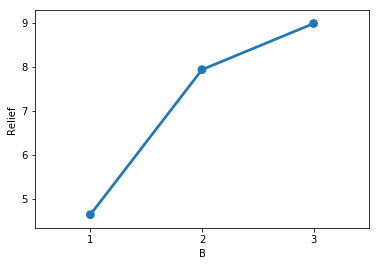

In [15]:
sns.pointplot(x='B',y='Relief',data=df,ci=None)

<br/>

<b>1.4) Analyse the effects of one variable on another with the help of an interaction plot.<br/> 
What is an interaction between two treatments?<br/>
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]</b>

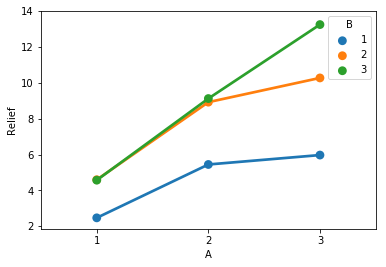

In [16]:
sns.pointplot(x='A',y='Relief',data=df,ci=None,hue='B')

<br/>

<b>1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’)<br/> 
with the variable 'Relief' and state your results</b>

In [17]:
#Without interaction between A and B
formula3='Relief~ C(A)+ C(B)'
model3=ols(formula3,df).fit()
anov_tab3=anova_lm(model3)
print(anov_tab3)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [18]:
#With interaction  between A and B
formula4='Relief~ C(A)+ C(B) + C(A):C(B)'
model4=ols(formula4,df).fit()
anov_tab4=anova_lm(model4)

In [19]:
print(anov_tab4)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN
